In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from utils import *
from setups import uncertainties, methods_config, methods_no_beta_estimate, metrics_config, variable_config, uncertainties_config


exp = "ExpA"

In [2]:
simulation_set_up = pd.read_csv(os.path.join("data", exp, "simulation_set_up.csv"))

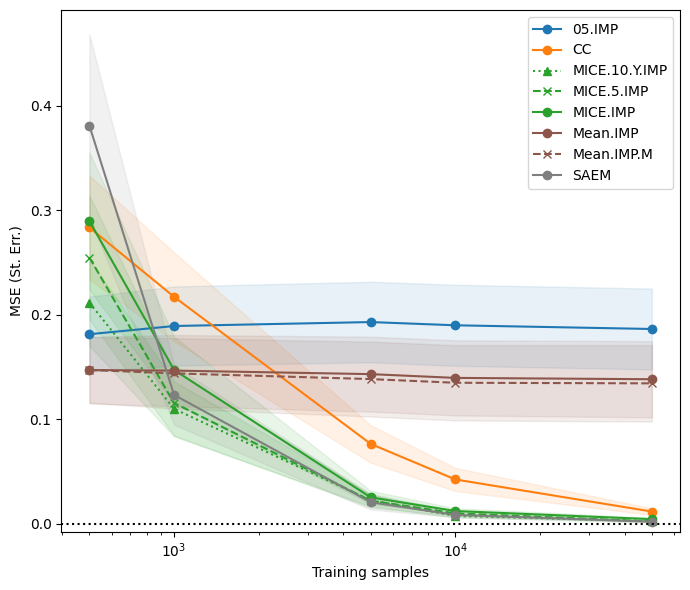

In [3]:

def plot_beta_scores_subplots(
        
        data,

        metric = "angular_error",
        variable = "corr",
        uncertainty = "se",

        log_x = True,
        log_y = False,
        min_y = -0.01,
        max_y = 1.01,

        select_methods = None,
        remove_methods = None,
        save = None,

        size_height=5,
        size_width=5,

        ##

        **kwargs
):
    
    df = filter_data(data, **kwargs)
    df = df[[metric, variable, "method", "n_train"]]
    df.loc[:,metric] = df.loc[:,metric].astype(float)
    df = df.groupby(["method", variable, "n_train"]).agg({metric: ["mean", uncertainties[uncertainty]]}).reset_index()
    df.columns = ["method", variable, "n_train", "mean", uncertainty]

    methods = df["method"].unique()
    if select_methods is not None:
        methods = [m for m in methods if m in select_methods]
    if remove_methods is not None:
        methods = [m for m in methods if m not in remove_methods]

    variables = df[variable].unique()

    fig, axs = plt.subplots(1, len(variables), figsize=(size_width*len(variables), size_height))
    if len(variables) == 1:
        axs = [axs]

    for i, var in enumerate(variables):

        ax = axs[i]

        for method in methods:
            if method in methods_no_beta_estimate and metric !="running_time":
                continue

            df_ = df[(df["method"] == method) & (df[variable] == var)]
            x = df_["n_train"]
            y = df_["mean"]
            yerr = df_[uncertainty]

            ax.plot(x, y, label=methods_config[method]["label"],
                     color=methods_config[method]["color"], 
                     marker=methods_config[method]["marker"],
                     linestyle=methods_config[method]["linestyle"])
            ax.fill_between(x, y - yerr, y + yerr, color=methods_config[method]["color"], alpha=0.1)

        if variable != "d":
            ax.set_title(f"{variable_config[variable]['label']} = {var}")
        
        ax.axhline(0, color="black", linestyle=":")
        ax.set_xlabel("Training samples")
        ax.set_ylabel(f"{metrics_config[metric]['label']} ({uncertainties_config[uncertainty]['label']})")
        ax.set_ylim(min_y, max_y)
        if i == 0:
            ax.legend()

        if log_x:
            ax.set_xscale("log")
        if log_y:
            ax.set_yscale("log")


    plt.tight_layout()
    if save is not None:
        plt.savefig(save)

    plt.show()


remove_methods=["ICE.IMP", "ICE.IMP.M", "ICEY.IMP.M", "ICEY.IMP", "MICE.M.IMP", "MICE.Y.M.IMP", "MICE.Y.IMP", "05.IMP.M"]
# remove_methods = None
select_methods = None
# select_methods= ["MICE.IMP", "MICE.M.IMP", "MICE.Y.IMP", "MICE.Y.M.IMP", "MICE.5.IMP"]

metric = "mse_error"


plot_beta_scores_subplots(
    simulation_set_up,
    metric = metric,
    variable="d",

    max_y=None,
    min_y = -0.008,

    remove_methods=remove_methods,
    select_methods=select_methods,

    size_height=6,
    size_width=7,

    # save="data/ExpA/figures/mse_CORR.pdf"

)


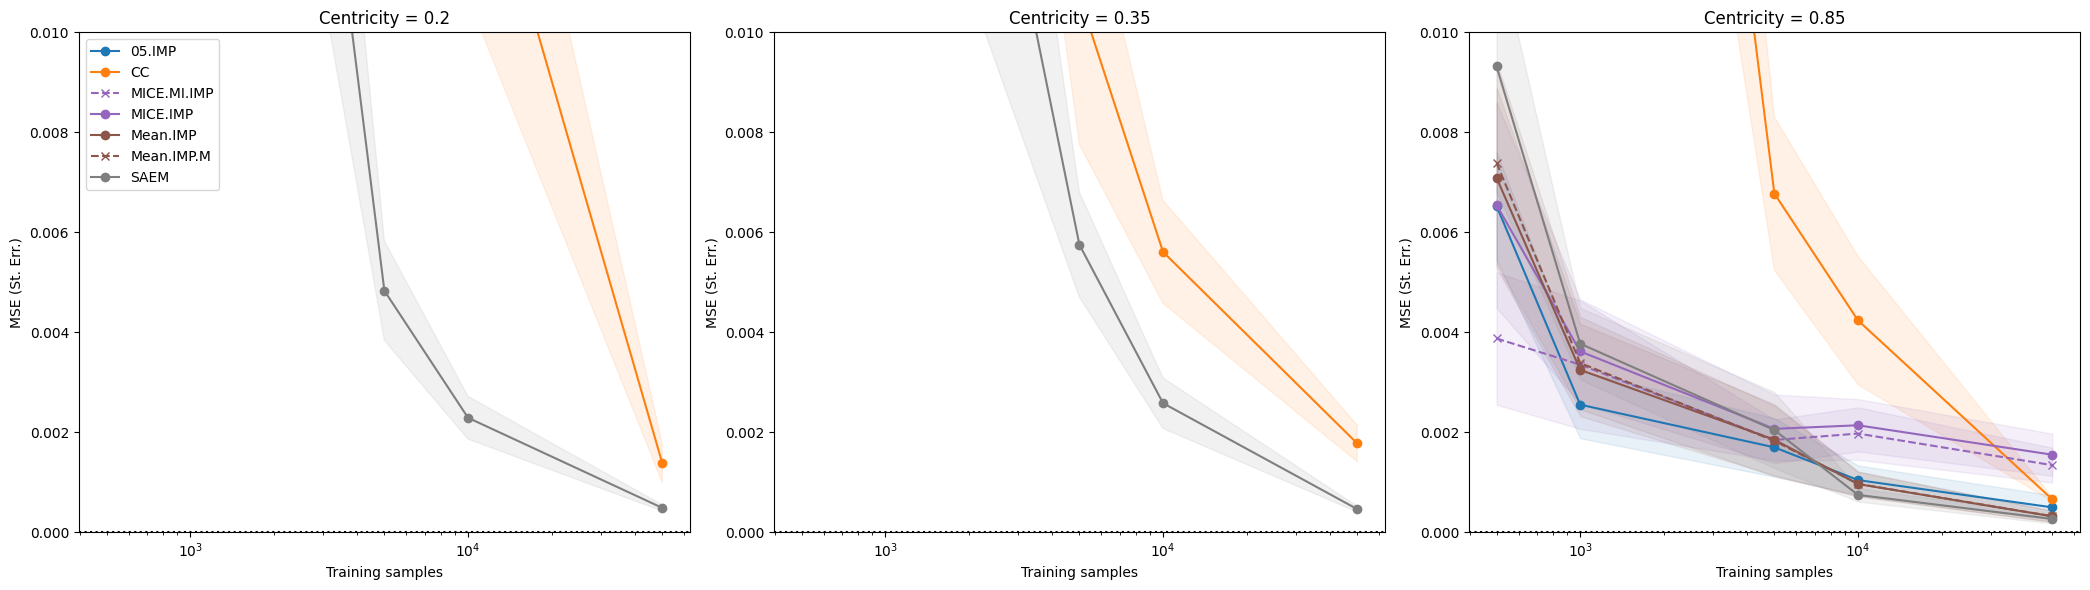

In [18]:
plot_beta_scores_subplots(
    simulation_set_up,
    metric = metric,
    variable="centricity",

    max_y=0.01,
    min_y =0,

    remove_methods=remove_methods,
    select_methods=select_methods,

    size_height=6,
    size_width=7,

)

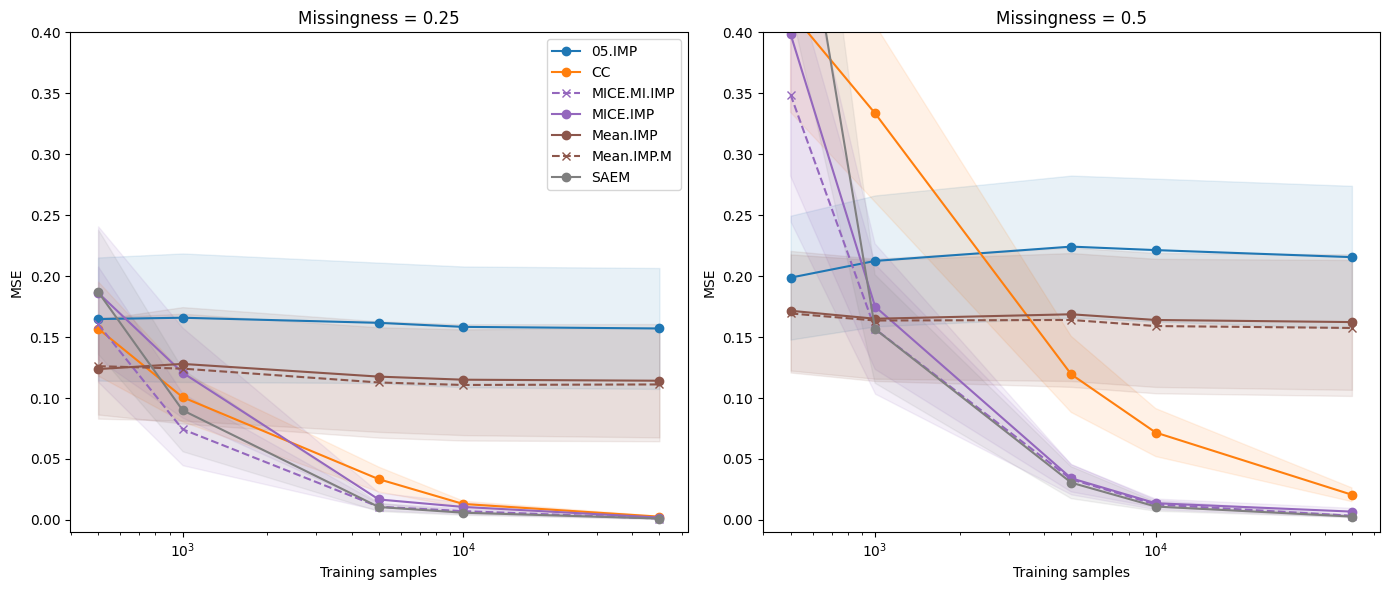

In [5]:
plot_beta_scores_subplots(
    simulation_set_up,
    metric = metric,
    variable="prcNA",

    max_y=0.4,

    remove_methods=remove_methods,
    select_methods=select_methods,

    size_height=6,
    size_width=7,


)

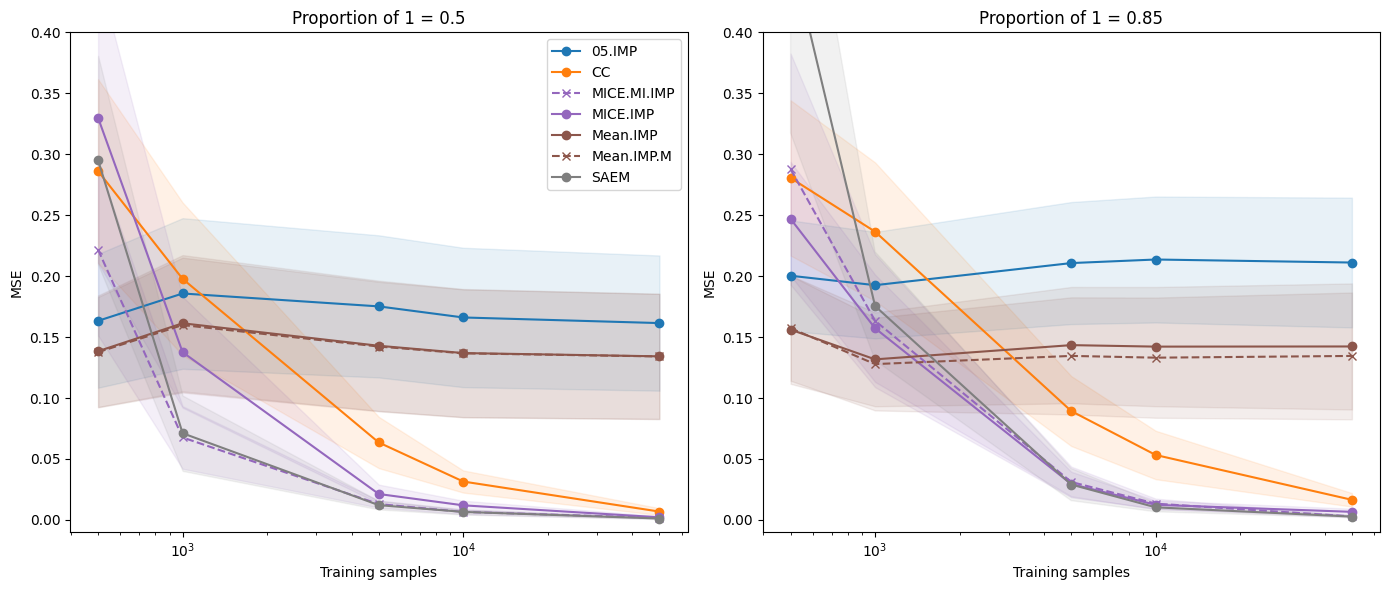

In [6]:
plot_beta_scores_subplots(
    simulation_set_up,
    metric = metric,
    variable="prop1",

    max_y=0.4,

    remove_methods=remove_methods,
    select_methods=select_methods,

    size_height=6,
    size_width=7,

)